In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

Prepare Data

In [10]:
test_dir = "./Processed_Split/Processed_Split/test/"
train_dir = "./Processed_Split/Processed_Split/train/"
val_dir = "./Processed_Split/Processed_Split/val/"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_dir, seed=42)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_dir, seed=42)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(val_dir, seed=42)
class_names = train_ds.class_names

Found 45828 files belonging to 50 classes.
Found 9504 files belonging to 50 classes.
Found 9438 files belonging to 50 classes.


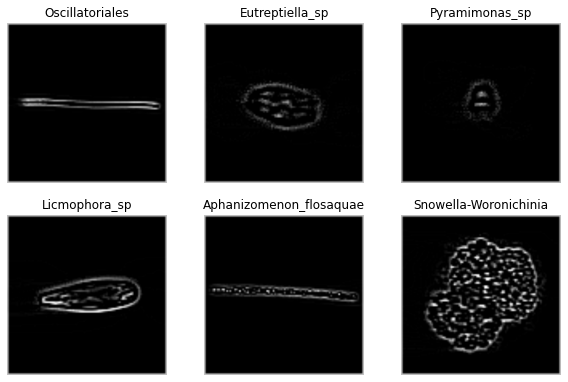

In [11]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Creating ResNet Model

In [26]:
resnet_model = Sequential()

trained_model = tf.keras.applications.ResNet50(include_top=False, pooling='avg', classes=50, weights='imagenet')
for layer in trained_model.layers:
        layer.trainable=False

resnet_model.add(trained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(50, activation='softmax'))
resnet_model.summary()

resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_9 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_10 (ModuleWr  (None, 512)              1049088   
 apper)                                                          
                                                                 
 module_wrapper_11 (ModuleWr  (None, 50)               25650     
 apper)                                                          
                                                                 
Total params: 24,662,450
Trainable params: 1,074,738
Non-trainable params: 23,587,712
__________________________________

In [15]:
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10, )


Epoch 1/10
1433/1433 [==============================] - 5047s 4s/step - loss: 0.4924 - val_loss: 0.3280
Epoch 2/10
1433/1433 [==============================] - 5001s 3s/step - loss: 0.2879 - val_loss: 0.2807
Epoch 3/10
1433/1433 [==============================] - 4827s 3s/step - loss: 0.2344 - val_loss: 0.2480
Epoch 4/10
1433/1433 [==============================] - 5072s 4s/step - loss: 0.1991 - val_loss: 0.2681
Epoch 5/10
1433/1433 [==============================] - 5047s 4s/step - loss: 0.1810 - val_loss: 0.2635
Epoch 6/10
1433/1433 [==============================] - 5054s 4s/step - loss: 0.1593 - val_loss: 0.2572
Epoch 7/10
1433/1433 [==============================] - 5016s 4s/step - loss: 0.1469 - val_loss: 0.2502
Epoch 8/10
1433/1433 [==============================] - 5018s 4s/step - loss: 0.1314 - val_loss: 0.2658
Epoch 9/10
1433/1433 [==============================] - 5015s 3s/step - loss: 0.1206 - val_loss: 0.2799
Epoch 10/10
1433/1433 [==============================] - 5127s 4

Model Accuracy Graph

In [ ]:
figures = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Model Loss Graph

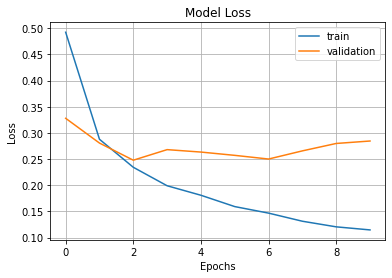

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Making Predictions with Model

In [ ]:
prediction = resnet_model.predict(test_ds)
